# In-class Example: A Frequency Filter

Let's see how we can use an FFT to filter high-frequency noise.  

We'll need our DFT functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dft(f_n):
    """perform a discrete Fourier transform"""
    
    N = len(f_n)
    n = np.arange(N)
    
    f_k = np.zeros((N), dtype=np.complex128)

    for k in range(N):
        f_k[k] = np.sum(f_n * np.exp(-2.0 * np.pi * 1j * n * k / N))
    return f_k

In [3]:
def idft(F_k):
    """perform an inverse discrete Fourier transform"""
    
    N = len(F_k)
    k = np.arange(N)
    
    f_n = np.zeros((N), dtype=np.float64)

    for n in range(N):
        f_n[n] = (1/N) * np.sum(F_k * np.exp(2.0 * np.pi * 1j * n * k / N)).real
    return f_n

Now let's create a sine wave and add lots of random noise

In [4]:
def f(x, nu=0.2):
    rng = np.random.default_rng()
    return np.sin(2.0 * np.pi * nu * x) + 0.5 * rng.standard_normal(len(x))

Let's look at the function now

In [5]:
xmax = 50
N = 128

x = np.linspace(0.0, xmax, N, endpoint=False)

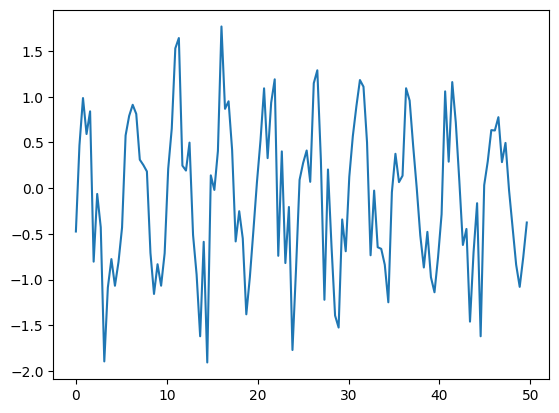

In [6]:
fig, ax = plt.subplots()
f_n = f(x)
ax.plot(x, f_n)

Let's try to remove this noise by working in frequency space.  Here's our plan:

* Transform our function to frequency space
* Plot the power spectrum to see the structure with frequency
* Zero out the Fourier components of any low-amplitude modes in the power spectrum
* Transform back to real space